In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [160]:
data=pd.read_csv('gld_price_data.csv')
gold_data=data.drop('Date',axis=1)

In [162]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [164]:
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [166]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [168]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [170]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [172]:
correlation=gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

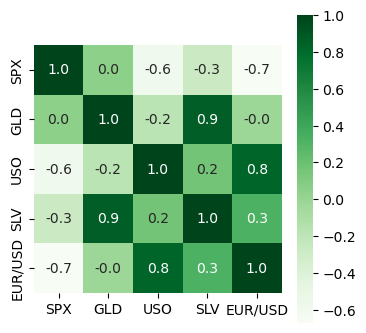

In [174]:
# construction of heatmap to understand correlation
plt.figure(figsize=(4,4))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,cmap='Greens')

In [175]:
# correlation values of gold
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<Figure size 400x400 with 0 Axes>

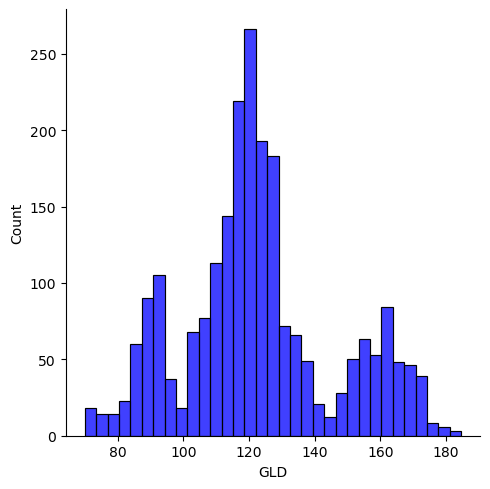

In [178]:
# Checking the distribution of the gold price
plt.figure(figsize=(4,4))
sns.displot(gold_data['GLD'],color='blue')

In [179]:
# Spliting the Features and targets
X=gold_data.drop('GLD',axis=1)
y=gold_data['GLD']

In [182]:
# Train_Test_Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [184]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

**Model Training=RandomForestRegressor**

In [187]:
regressor=RandomForestRegressor()

In [189]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

**Model Evaluation**

In [191]:
# prediction on test data
y_pred=regressor.predict(X_test)

In [192]:
y_pred

array([168.57909961,  82.40009948, 116.1007003 , 127.49770076,
       120.75270169, 154.70379804, 150.28369851, 125.98820026,
       117.54139864, 125.820201  , 116.41960116, 171.76420074,
       142.12019887, 167.85189857, 115.13410026, 117.79560065,
       139.43610307, 169.75140052, 159.89100289, 158.00260011,
       154.95620035, 124.78750035, 176.0706997 , 157.86230317,
       125.17230046,  94.03830015,  77.70459984, 120.46620032,
       119.04079903, 167.4251996 ,  88.10620064, 125.37720013,
        91.22900076, 117.68060038, 121.17939883, 136.47300101,
       115.35540143, 115.27080105, 147.05659988, 107.40220116,
       104.36320265,  87.27809785, 126.43160039, 118.13819999,
       153.87279878, 119.59030018, 108.45980017, 108.06219804,
        93.27520043, 126.99659838,  74.58750061, 113.61669929,
       120.93299991, 111.26109926, 118.89009914, 120.65789963,
       158.66690071, 168.06890133, 146.8807968 ,  85.6223984 ,
        94.38300008,  86.79259912,  90.43269989, 118.94

In [195]:
# R squared error
error_score=metrics.r2_score(y_test,y_pred)
error_score

0.9888079405447209

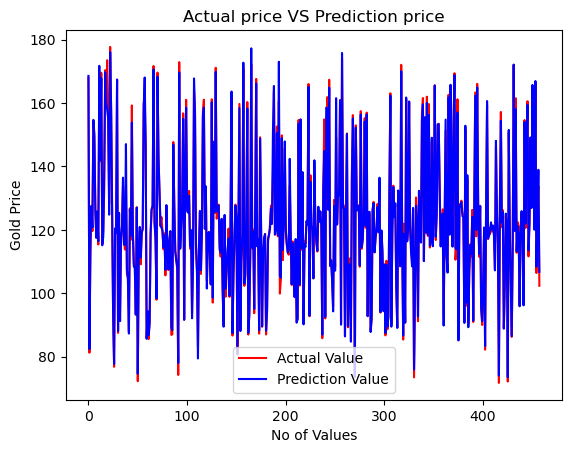

In [198]:
plt.plot(list(y_test),color='r',label='Actual Value')
plt.plot(y_pred,color='b',label='Prediction Value')
plt.xlabel('No of Values')
plt.ylabel('Gold Price')
plt.title('Actual price VS Prediction price')
plt.legend()
plt.show()